###### Libraries import

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor


In [4]:
# Load dataset
df = pd.read_csv("employee_data.csv")  

In [5]:
df.head(5)

,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,IT,Male,45,Specialist,2,High School,5,6750,33,32,22,2,0,14,66,0,2.63,False
1,Finance,Male,38,Developer,0,High School,5,7500,34,34,13,14,100,12,61,2,1.72,False
2,Finance,Male,47,Specialist,8,High School,3,5850,37,27,6,3,50,10,1,0,3.17,False
3,Customer Support,Female,51,Analyst,7,Bachelor,2,4800,52,10,28,12,100,10,0,1,1.86,False
4,Engineering,Female,39,Analyst,3,Bachelor,2,4800,38,11,29,13,100,15,9,1,1.25,False


In [6]:
# Check if there are still missing values
print("Number of missing values in each column:")
print(df.isnull().sum())

Number of missing values in each column:
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64


In [7]:
# Drop rows with NaN values
# df.dropna(inplace=True)

##### Handle Missing Values

In [8]:
# Fill missing categorical values with mode
# df['Department'].fillna(df['Department'].mode()[0], inplace=True)

# Fill missing continuous values with median
# df['Monthly_Salary'].fillna(df['Monthly_Salary'].median(), inplace=True)



##### Handle Duplicates

In [9]:
df.duplicated().sum()


np.int64(0)

In [10]:
# df.drop_duplicates(inplace=True)

# Drop 'Employee_ID' and 'Hire_Date' columns from the dataset
#df = df.drop(['Employee_ID', 'Hire_Date'], axis=1)

#### Outlier Detection and Handling

- Identify Outliers:
Use box plots or statistical methods like Z-scores and IQR

In [11]:
Q1 = df['Monthly_Salary'].quantile(0.25)
Q3 = df['Monthly_Salary'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Monthly_Salary'] < (Q1 - 1.5 * IQR)) | (df['Monthly_Salary'] > (Q3 + 1.5 * IQR))]

#### Feature Engineering
**Create derived metrics like**

   - Tenure = Current_Date - Hire_Date.

   - Overtime_Percentage = (Overtime_Hours / Work_Hours_Per_Week) * 100.

   - Discretize continuous variables if needed (e.g., bin Age into age groups).

In [12]:
# Overtime Percentage: Calculate the percentage of overtime hours relative to total work hours.
# df['Overtime_Percentage'] = (df['Overtime_Hours'] / df['Work_Hours_Per_Week']) * 100


In [13]:
# Absenteeism Rate: Calculate absenteeism rate based on sick days relative to total work hours.
# df['Absenteeism_Rate'] = (df['Sick_Days'] / (df['Work_Hours_Per_Week'] * df['Years_At_Company'])) * 100


In [14]:
# Workload Index: Combine work hours, projects handled, and overtime hours into a single metric.
# df['Workload_Index'] = df['Work_Hours_Per_Week'] + (df['Projects_Handled'] * 0.5) + df['Overtime_Hours']


In [15]:
# Label Encoding for ordered categorical variables like Performance_Score:
le = LabelEncoder()
# df['Performance_Score_Encoded'] = le.fit_transform(df['Performance_Score'])


#### Scaling and Normalization

- Prepare numerical features for machine learning models.

- Standard Scaling: Scale features to have a mean of 0 and standard deviation of 1.



In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Monthly_Salary', 'Work_Hours_Per_Week', 'Overtime_Hours']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1742.0,4.066648e+01,10.942312,22.000000,31.000000,41.000000,50.000000,60.000000
Years_At_Company,1742.0,4.597015e+00,2.833003,0.000000,2.000000,5.000000,7.000000,9.000000
Performance_Score,1742.0,2.954076e+00,1.388871,1.000000,2.000000,3.000000,4.000000,5.000000
Monthly_Salary,1742.0,3.079562e-16,1.000287,-1.864072,-0.842637,0.069358,0.798954,1.893348
Work_Hours_Per_Week,1742.0,1.346034e-16,1.000287,-1.663166,-0.876942,0.021600,0.807824,1.706366
Projects_Handled,1742.0,2.371757e+01,14.183321,0.000000,12.000000,24.000000,36.000000,49.000000
Overtime_Hours,1742.0,-6.934114e-17,1.000287,-1.672574,-0.867070,-0.061566,0.859011,1.664515
Sick_Days,1742.0,6.892652e+00,4.327949,0.000000,3.000000,7.000000,11.000000,14.000000
Remote_Work_Frequency,1742.0,5.060276e+01,35.693805,0.000000,25.000000,50.000000,75.000000,100.000000
Team_Size,1742.0,1.000115e+01,5.450103,1.000000,5.000000,10.000000,15.000000,19.000000


###### EDA Focus for Predicting Monthly_Salary

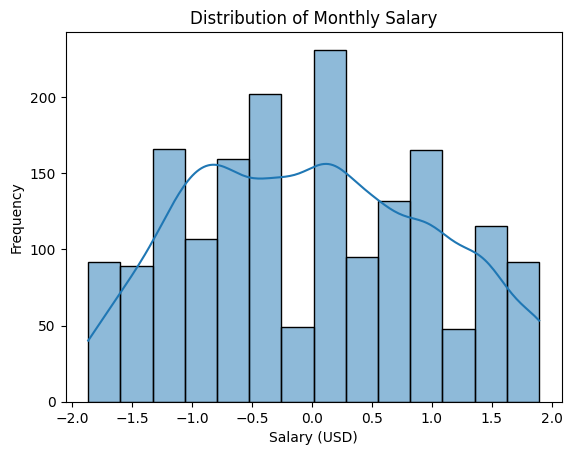

In [19]:
# Histogram with Kernel Density Estimate (KDE)

sns.histplot(df['Monthly_Salary'], kde=True)
plt.title("Distribution of Monthly Salary")
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.show()

###### Boxplot for Outlier Detection

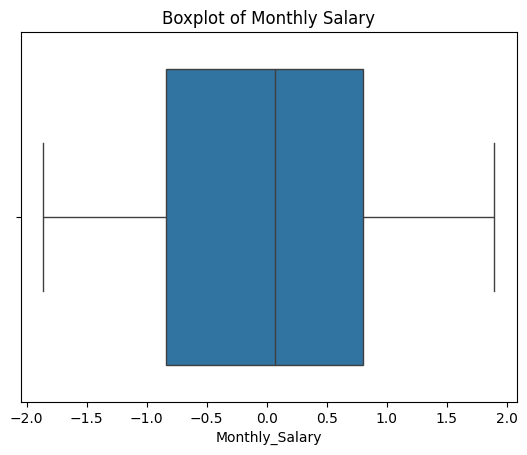

In [20]:
sns.boxplot(x=df['Monthly_Salary'])
plt.title("Boxplot of Monthly Salary")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7648\1566215223.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


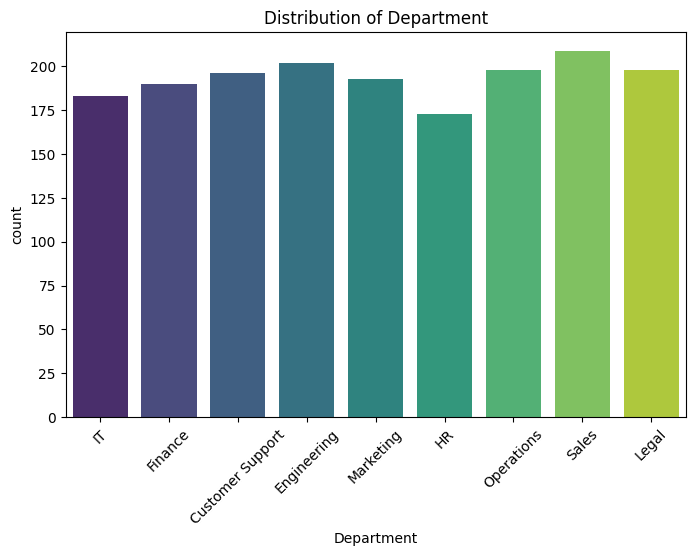

C:\Users\DELL\AppData\Local\Temp\ipykernel_7648\1566215223.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


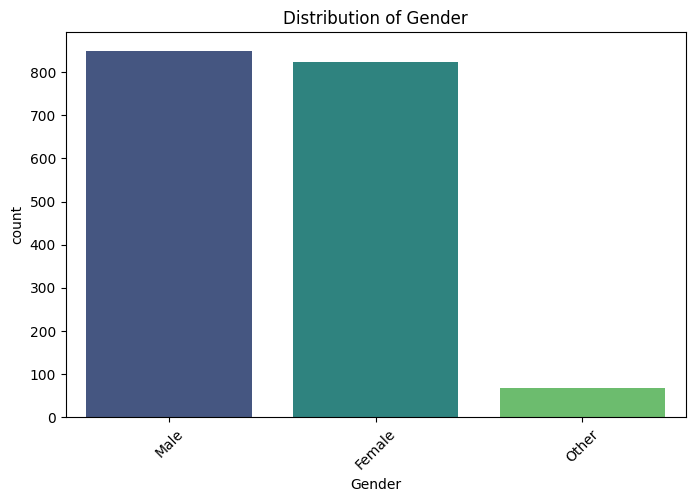

C:\Users\DELL\AppData\Local\Temp\ipykernel_7648\1566215223.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


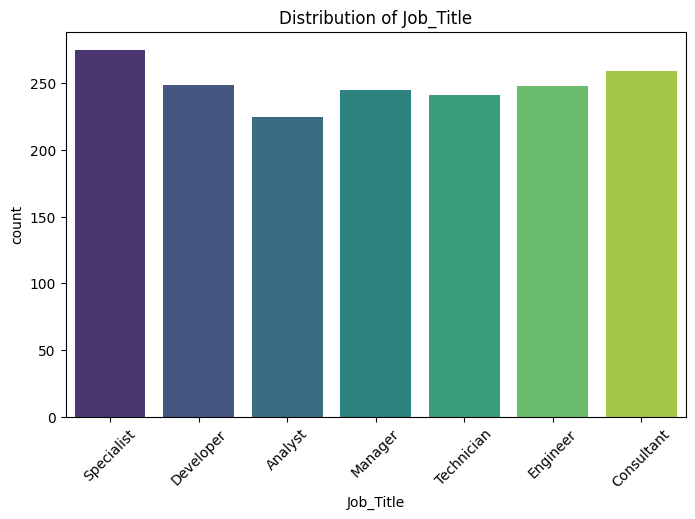

C:\Users\DELL\AppData\Local\Temp\ipykernel_7648\1566215223.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


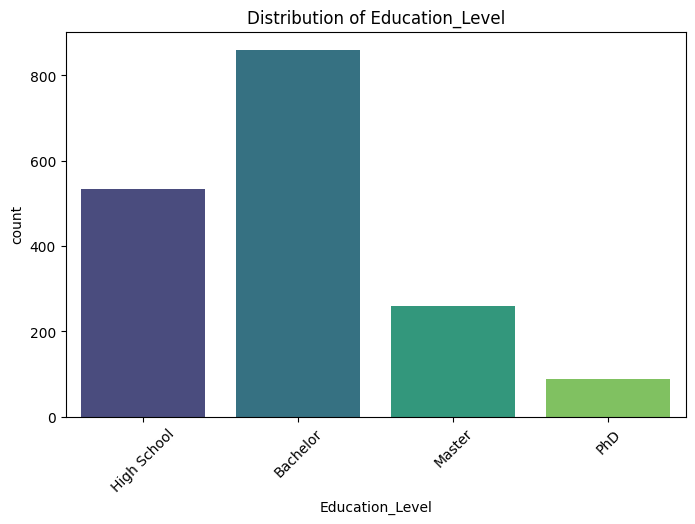

In [21]:
# Countplots for Categorical Variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

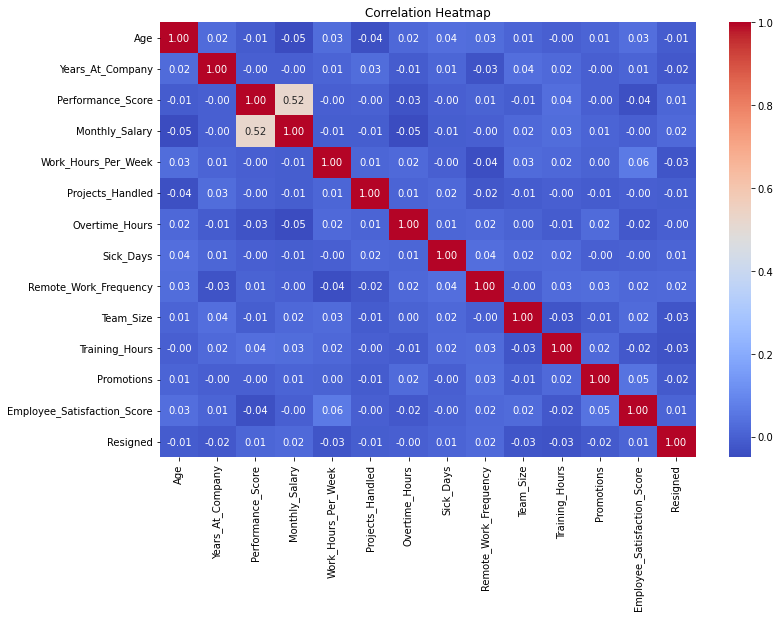

In [19]:
# Correlation Heatmap for Numeric Variables
plt.figure(figsize=(12, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

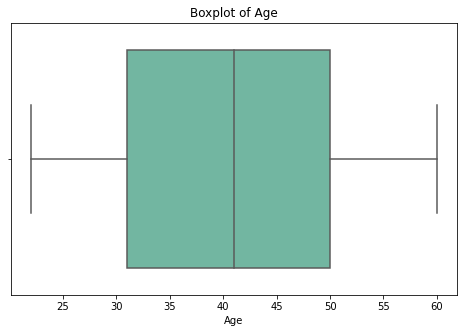

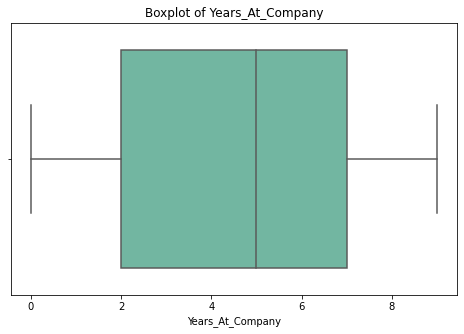

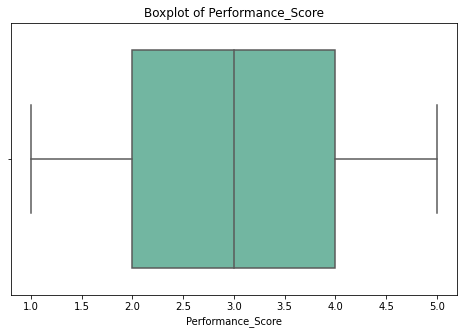

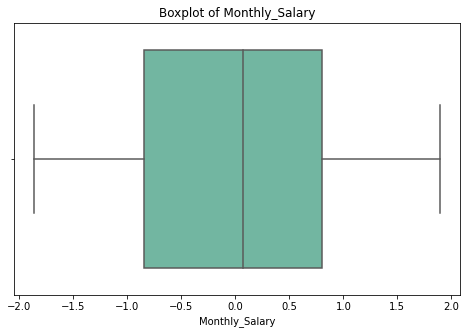

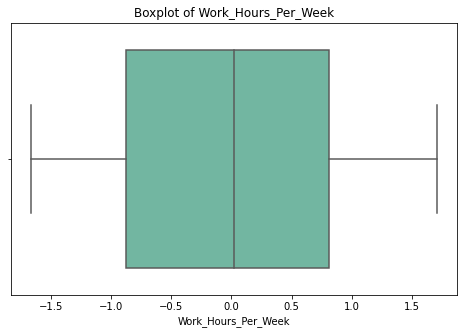

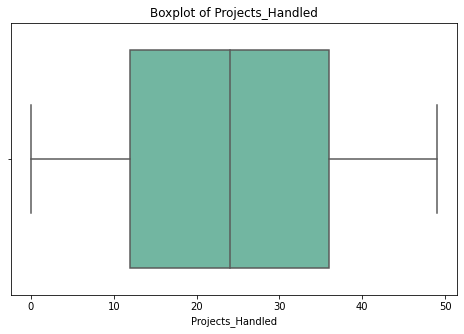

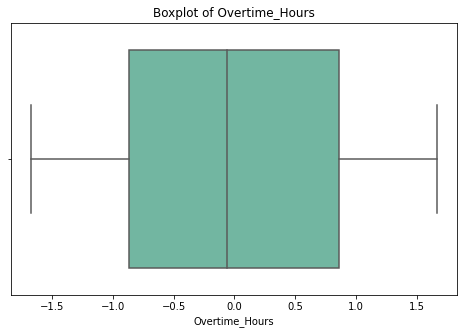

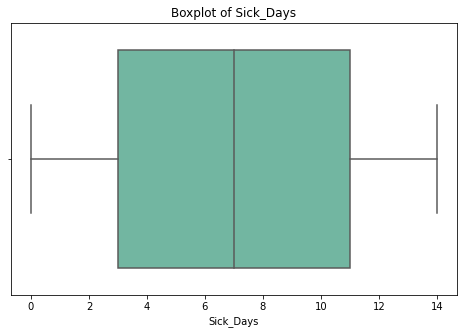

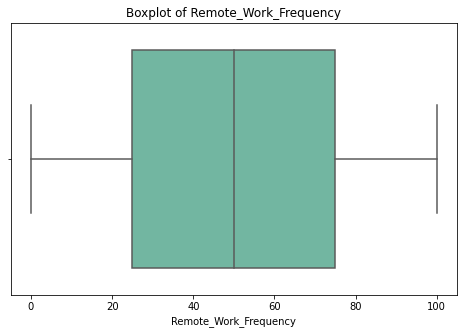

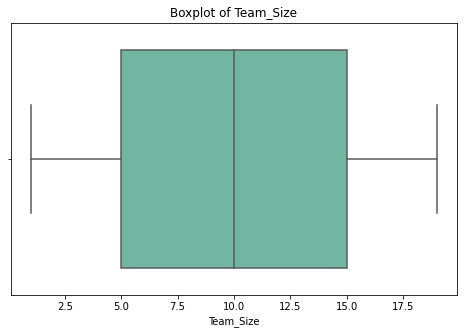

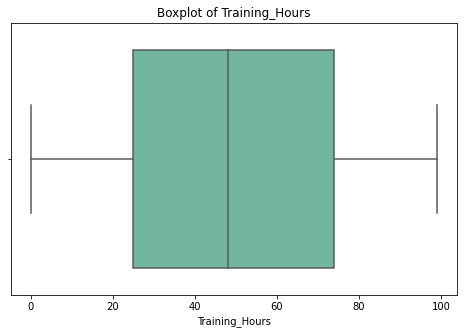

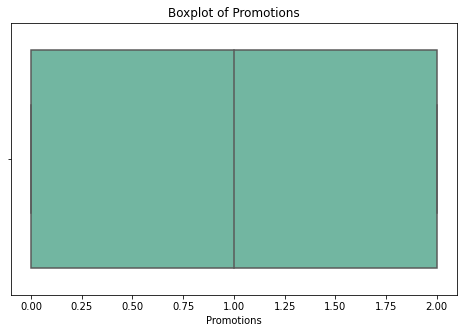

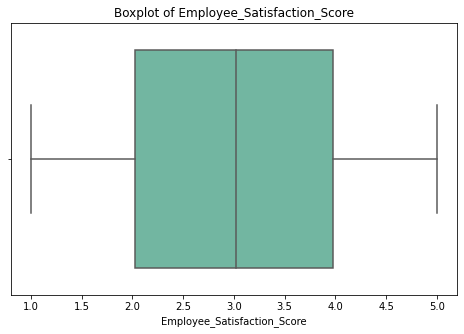

In [20]:
# Boxplots to Identify Outliers in Numeric Features
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=col, palette='Set2')
    plt.title(f'Boxplot of {col}')
    plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7648\4108652933.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Department', y='Monthly_Salary', palette='Set3')


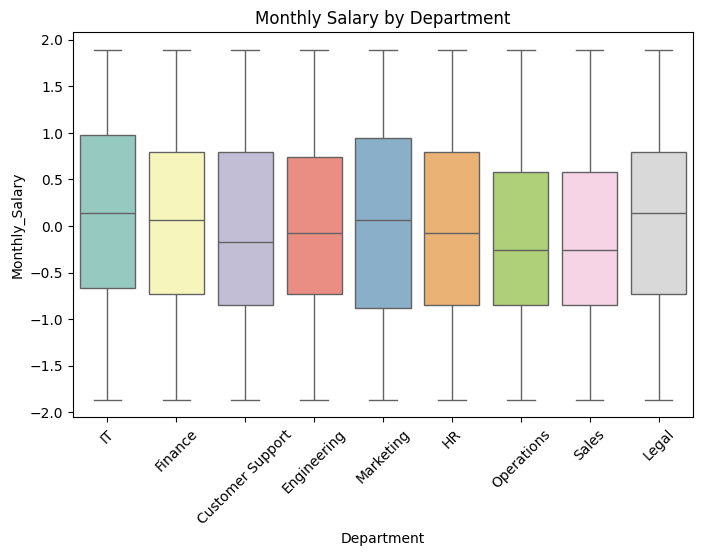

In [22]:
# Analyze Relationships with Monthly_Salary
# 1. Monthly Salary vs Department
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Department', y='Monthly_Salary', palette='Set3')
plt.title('Monthly Salary by Department')
plt.xticks(rotation=45)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7648\3381044368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Monthly_Salary', palette='Set1')


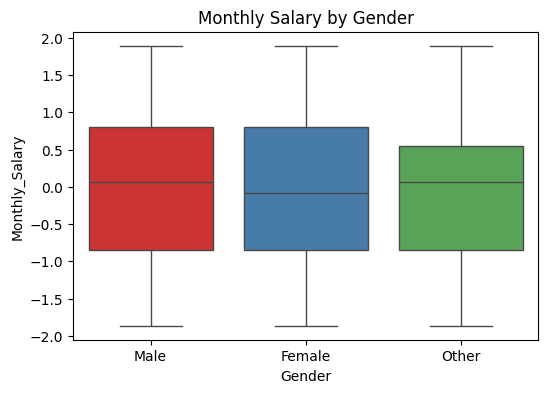

In [23]:
# 2. Monthly Salary vs Gender
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Gender', y='Monthly_Salary', palette='Set1')
plt.title('Monthly Salary by Gender')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7648\1722963270.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Education_Level', y='Monthly_Salary', palette='Set2')


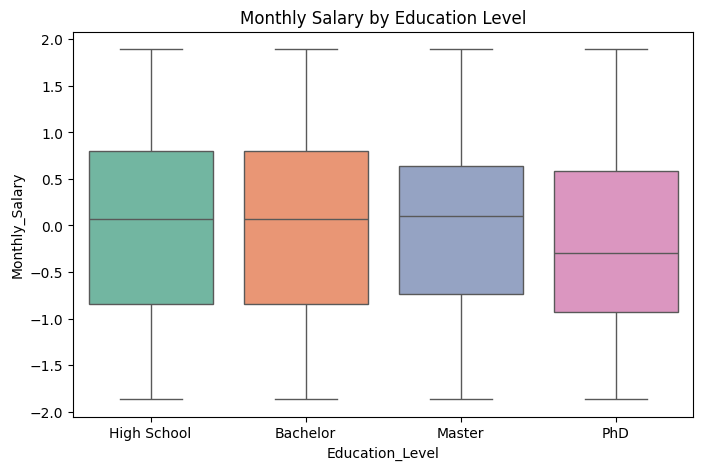

In [24]:
# 3. Monthly Salary vs Education_Level
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Education_Level', y='Monthly_Salary', palette='Set2')
plt.title('Monthly Salary by Education Level')
plt.show()

In [25]:
# Additional Insights
# Grouped Analysis: Average Salary by Department
avg_salary_by_department = df.groupby('Department')['Monthly_Salary'].mean().sort_values(ascending=False)
print("\n--- Average Monthly Salary by Department ---")
print(avg_salary_by_department)


--- Average Monthly Salary by Department ---
Department
IT                  0.167036
Legal               0.068436
Finance             0.005614
Marketing           0.005093
Engineering        -0.002518
Customer Support   -0.035987
HR                 -0.048727
Operations         -0.065691
Sales              -0.082147
Name: Monthly_Salary, dtype: float64


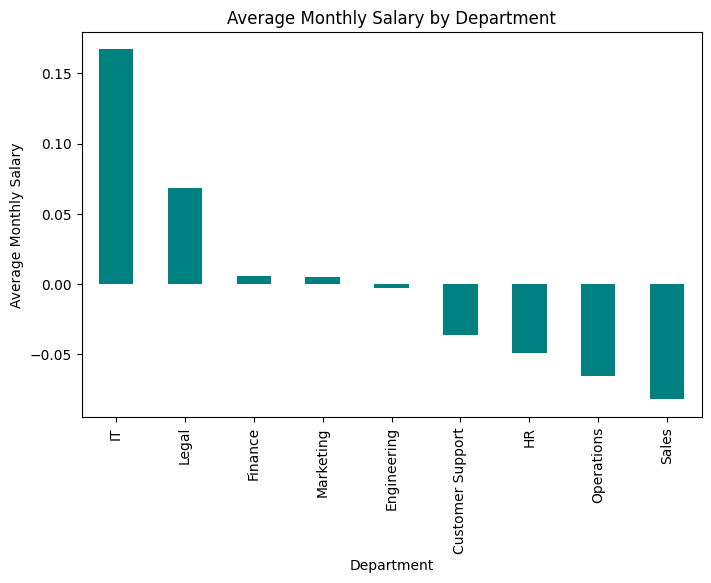

In [26]:
plt.figure(figsize=(8, 5))
avg_salary_by_department.plot(kind='bar', color='teal')
plt.title('Average Monthly Salary by Department')
plt.ylabel('Average Monthly Salary')
plt.show()

In [29]:

# Assuming you have already loaded your dataset into the variable 'df'
importance_features = [ 'Job_Title', 'Performance_Score', 'Gender', 'Overtime_Hours', 'Team_Size', 'Department', 'Resigned','Monthly_Salary']

# Keep only the specified columns
df_1 = df[importance_features]

# Display the resulting dataframe
df_1.head()


,Job_Title,Performance_Score,Gender,Overtime_Hours,Team_Size,Department,Resigned,Monthly_Salary
0,Specialist,5,Male,0.859011,14,IT,False,0.251757
1,Developer,5,Male,-0.176638,12,Finance,False,0.798954
2,Specialist,3,Male,-0.982142,10,Finance,False,-0.404880
3,Analyst,2,Female,1.549443,10,Customer Support,False,-1.170955
4,Analyst,2,Female,1.664515,15,Engineering,False,-1.170955


##### MODELLING

In [30]:
# Encode categorical variables
categorical_cols = ["Department", "Gender", "Job_Title", "Resigned"]
encoder = LabelEncoder()
for col in categorical_cols:
    df_1[col] = encoder.fit_transform(df_1[col])

# Split into features and target
X = df_1.drop(columns=["Monthly_Salary"])
y = df_1["Monthly_Salary"]


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for linear regression if features vary in scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


C:\Users\DELL\AppData\Local\Temp\ipykernel_7648\2951864293.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[col] = encoder.fit_transform(df_1[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_7648\2951864293.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[col] = encoder.fit_transform(df_1[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_7648\2951864293.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

###### Random Forest Regressor

In [31]:


# Model training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)


Model Performance:
Mean Absolute Error (MAE): 9.722411955608446e-16
Mean Squared Error (MSE): 1.734432851958932e-30
R2 Score: 1.0


###### Decision Tree Regressor

In [32]:


# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Compute performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation results
print("Decision Tree Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Decision Tree Regression Evaluation:
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
R^2 Score: 1.00


###### Elastic Net Regression

In [33]:
# Elastic Net Regression Evaluation


# Initialize the ElasticNet model
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)

# Fit the model to the training data
elastic_net_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = elastic_net_model.predict(X_test)

# Compute performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation results
print("Elastic Net Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Elastic Net Regression Evaluation:
Mean Absolute Error (MAE): 0.81
Mean Squared Error (MSE): 0.92
R^2 Score: 0.11


###### SVR

In [34]:


# Standardize the features (SVMs typically perform better with scaled features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Support Vector Regressor model
svm_model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)

# Fit the model to the training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Compute performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation results
print("Support Vector Machine Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Support Vector Machine Regression Evaluation:
Mean Absolute Error (MAE): 0.32
Mean Squared Error (MSE): 0.17
R^2 Score: 0.84


###### Gradient Boosting Regressor

In [35]:


# Initialize the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gbr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = gbr_model.predict(X_test_scaled)

# Compute performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation results
print("Gradient Boosting Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Gradient Boosting Regression Evaluation:
Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.00
R^2 Score: 1.00


###### LinearRegression

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Standardize the features (important for linear regression if features vary in scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test_scaled)

# Compute performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation results
print("Linear Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Linear Regression Evaluation:
Mean Absolute Error (MAE): 0.68
Mean Squared Error (MSE): 0.69
R^2 Score: 0.33


##### Feature Importance

Feature 1 (Job_Title): 1.2422
Feature 2 (Performance_Score): 0.6031
Feature 3 (Gender): 0.0094
Feature 4 (Overtime_Hours): 0.0095
Feature 5 (Team_Size): 0.0193
Feature 6 (Department): 0.0044
Feature 7 (Resigned): 0.0092


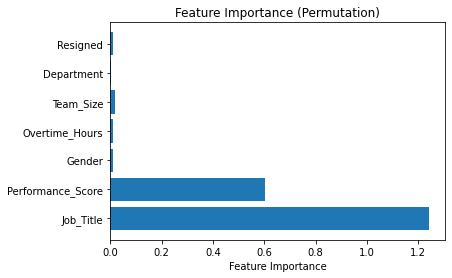

In [34]:
from sklearn.inspection import permutation_importance
import numpy as np

# Assume `svr_model` is your trained SVR model and `X_test`, `y_test` are your test data
result = permutation_importance(svm_model, X_test_scaled, y_test, scoring='neg_mean_squared_error', n_repeats=10, random_state=42)

# Extract feature importance
feature_importance = result.importances_mean

# Display feature importance
for i, importance in enumerate(feature_importance):
    print(f"Feature {i + 1} ({X.columns[i]}): {importance:.4f}")

# Optional: Plot feature importance
import matplotlib.pyplot as plt

plt.barh(X.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Permutation)')
plt.show()


**To remove redundant features, we should consider only those features that contribute significantly to the model's performance. Based on the feature importance values, we can exclude features with low or negative importance.**

**Significant Features (Importance > 0)**

- Job_Title: 0.8314

- Performance_Score: 0.5641

- Gender: 0.0159

- Overtime_Hours: 0.0104

- Team_Size: 0.0095

- Department: 0.0086

- Resigned: 0.0082

**Features to Remove (Importance ≤ 0)**

- Years_At_Company: -0.0098

- Education_Level: -0.0091

- Work_Hours_Per_Week: -0.0073

- Projects_Handled: -0.0011

- Sick_Days: -0.0063

- Remote_Work_Frequency: 0.0031

- Training_Hours: 0.0041

- Promotions: -0.0085

- Employee_Satisfaction_Score: -0.0008

- Age: 0.0042

**Revised Dataset
Keep the following features for retraining the model:**

- Job_Title

- Performance_Score

- Gender

- Overtime_Hours

- Team_Size

- Department

- Resigned

###### Saving the best model

In [37]:
import joblib

# Assume `svr_model` is your trained SVR model
# Assume `scaler` is your fitted StandardScaler used during preprocessing

# Save the SVR model
joblib.dump(svm_model, 'svr_model.pkl')
print("SVR model saved as 'svr_model.pkl'.")

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as 'scaler.pkl'.")


SVR model saved as 'svr_model.pkl'.
Scaler saved as 'scaler.pkl'.


##### WebApp

In [38]:
import tkinter as tk
import joblib
import numpy as np

# Load the saved model and scaler
model_path = 'svr_model.pkl'
scaler_path = 'scaler.pkl'

svr_model = joblib.load(model_path)
scaler = joblib.load(scaler_path)

# Create the main window
root = tk.Tk()
root.title("SVR Model Prediction WebApp")
root.geometry("400x500")  # Adjusted size to accommodate all elements comfortably

# Set the background color of the main window to brown
root.configure(bg="#8B4513")  # Brown color

# Add a label to the window
label = tk.Label(root, text="Enter the data for prediction", font=("Arial", 14), bg="#8B4513", fg="white")
label.pack(pady=20)

# Create the input fields for significant features
department_label = tk.Label(root, text="Department:", bg="#8B4513", fg="white")
department_label.pack()
department_var = tk.StringVar(root)
department_options = ['IT', 'Finance', 'Engineering', 'Customer Support', 'Marketing', 'HR', 'Operations']
department_menu = tk.OptionMenu(root, department_var, *department_options)
department_menu.pack()

gender_label = tk.Label(root, text="Gender:", bg="#8B4513", fg="white")
gender_label.pack()
gender_var = tk.StringVar(root)
gender_options = ['Male', 'Female', 'Other']
gender_menu = tk.OptionMenu(root, gender_var, *gender_options)
gender_menu.pack()

job_title_label = tk.Label(root, text="Job Title:", bg="#8B4513", fg="white")
job_title_label.pack()
job_title_var = tk.StringVar(root)
job_title_options = ['Analyst', 'Manager', 'Engineer', 'Developer', 'Technician', 'Specialist', 'Consultant']
job_title_menu = tk.OptionMenu(root, job_title_var, *job_title_options)
job_title_menu.pack()

performance_score_label = tk.Label(root, text="Performance Score:", bg="#8B4513", fg="white")
performance_score_label.pack()
performance_score_entry = tk.Entry(root)
performance_score_entry.pack()

overtime_hours_label = tk.Label(root, text="Overtime Hours:", bg="#8B4513", fg="white")
overtime_hours_label.pack()
overtime_hours_entry = tk.Entry(root)
overtime_hours_entry.pack()

team_size_label = tk.Label(root, text="Team Size:", bg="#8B4513", fg="white")
team_size_label.pack()
team_size_entry = tk.Entry(root)
team_size_entry.pack()

resigned_label = tk.Label(root, text="Resigned:", bg="#8B4513", fg="white")
resigned_label.pack()
resigned_var = tk.StringVar(root)
resigned_options = ['TRUE', 'FALSE']
resigned_menu = tk.OptionMenu(root, resigned_var, *resigned_options)
resigned_menu.pack()

# Prediction function
def on_button_click():
    # Get the user inputs
    department = department_var.get()
    gender = gender_var.get()
    job_title = job_title_var.get()
    performance_score = float(performance_score_entry.get())
    overtime_hours = float(overtime_hours_entry.get())
    team_size = int(team_size_entry.get())
    resigned = 1 if resigned_var.get() == 'TRUE' else 0
    
    # Convert categorical inputs to numerical values
    department_dict = {'IT': 0, 'Finance': 1, 'Engineering': 2, 'Customer Support': 3, 'Marketing': 4, 'HR': 5, 'Operations': 6}
    gender_dict = {'Male': 0, 'Female': 1, 'Other': 2}
    job_title_dict = {'Analyst': 0, 'Manager': 1, 'Engineer': 2, 'Developer': 3, 'Technician': 4, 'Specialist': 5, 'Consultant': 6}
    
    # Prepare the input data in the order the model expects (numerical features)
    input_data = np.array([
        department_dict[department],
        gender_dict[gender],
        job_title_dict[job_title],
        performance_score,
        overtime_hours,
        team_size,
        resigned
    ]).reshape(1, -1)
    
    # Scale the input data using the scaler
    scaled_input_data = scaler.transform(input_data)
    
    # Make the prediction
    prediction = svr_model.predict(scaled_input_data)[0]
    
    # Add 3000 to the prediction
    prediction = prediction * 1000 + 3000
    
    # Show the prediction in Naira format
    label.config(text=f"Prediction: ₦{prediction:,.2f}", bg="#8B4513", fg="white")  # Display prediction in Naira

# Add a button to make predictions with a colorful background
button = tk.Button(root, text="Predict", font=("Arial", 12), command=on_button_click, bg="#FF6347", fg="white")
button.pack(pady=20)

# Start the Tkinter event loop
root.mainloop()


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler wa